In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define file paths
phase_file = "../data/longer_period_fixed_gap/20250213/ciliate_302fil_9000blob_8.00R_0.0010torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.4000freqshift_true_states.dat"
force_file = "../data/longer_period_fixed_gap/20250213/ciliate_302fil_9000blob_8.00R_0.0010torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.4000freqshift_seg_forces.dat"
velocity_file = "../data/longer_period_fixed_gap/20250213/ciliate_302fil_9000blob_8.00R_0.0010torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.4000freqshift_seg_vels.dat"

# Read the .dat files into NumPy arrays
phase = np.loadtxt(phase_file)
force = np.loadtxt(force_file)
velocity = np.loadtxt(velocity_file)

downstream = {}
upstream = {}

# Start: 1 (first useful value); End: 1 + 20*6 (last useful value); Step : 6
downstream['force'] = np.array([force[:, i:i+3] for i in range(1, 121, 6)])
upstream['force'] = np.array([force[:, i:i+3] for i in range(-6, -121, -6)])
downstream['velocity'] = np.array([velocity[:, i:i+3] for i in range(1, 121, 6)])
upstream['velocity'] = np.array([velocity[:, i:i+3] for i in range(-6, -121, -6)])
downstream['phase'] = np.array(phase[:, 2])
upstream['phase'] = np.array(phase[:, -1])


In [19]:

# Transpose force and velocity arrays so that T is the first index
downstream['force'] = np.transpose(downstream['force'], (1, 0, 2))
upstream['force'] = np.transpose(upstream['force'], (1, 0, 2))
downstream['velocity'] = np.transpose(downstream['velocity'], (1, 0, 2))
upstream['velocity'] = np.transpose(upstream['velocity'], (1, 0, 2))

# Calculate dissipation
downstream['dissipation'] = np.einsum('ijk,ijk->i', downstream['force'], downstream['velocity'])
upstream['dissipation'] = np.einsum('ijk,ijk->i', upstream['force'], upstream['velocity'])

# Calculate generalised force
downstream['generalised_force'] = downstream['dissipation'] / (2*np.pi)
upstream['dissipation'] = upstream['dissipation'] / (1.4*2*np.pi)

In [21]:
t = np.linspace(0, 7, downstream['dissipation'].shape[0])

In [28]:
# Fit a linear model to the downstream and upstream phase data
downstream_slope, downstream_intercept = np.polyfit(t, downstream['phase'], 1)
upstream_slope, upstream_intercept = np.polyfit(t, upstream['phase'], 1)

print(f"Downstream phase slope: {downstream_slope}")
print(f"Upstream phase slope: {upstream_slope}")

upstream_slope/downstream_slope

Downstream phase slope: 6.28280639538619
Upstream phase slope: 6.072998038320807


0.9666059490199385

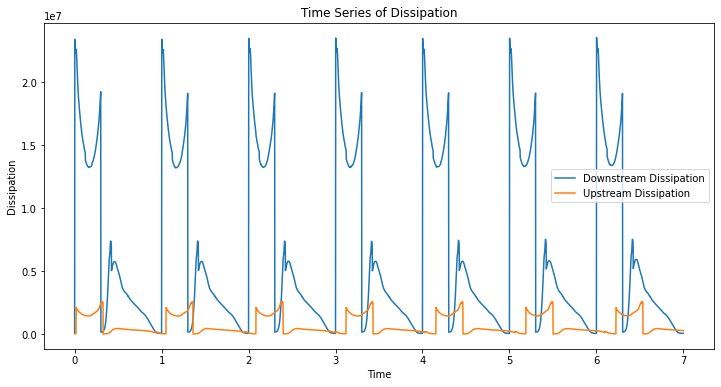

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(t, downstream['dissipation'], label='Downstream Dissipation')
plt.plot(t, upstream['dissipation'], label='Upstream Dissipation')
plt.xlabel('Time')
plt.ylabel('Dissipation')
plt.title('Time Series of Dissipation')
plt.legend()
plt.show()